In [1]:
### import 

from selenium import webdriver  ## chrome 브라우저 불러오기
from time import sleep
from bs4 import BeautifulSoup    ##핵심 element를 가지고 오기 

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

import pickle


In [6]:
pwd

'/Users/kimkwangil/Project/Covid19_SentimentalAnalysis/LSTM_covid19_news_analysis'

<html class="no-js" lang="en-US">
 <!--<![endif]-->
 <head>
  <script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101">
  </script>
  <script async="" src="https://www.googleadservices.com/pagead/conversion_async.js" type="text/javascript">
  </script>
  <!-- Piano / VX Composer -->
  <script async="" src="//cse.google.com/adsense/search/async-ads.js">
  </script>
  <script async="" src="//c.aaxads.com/aax.js?pub=AAX428WDR&amp;hst=www.washingtontimes.com&amp;ver=1.2" type="text/javascript">
  </script>
  <script async="" src="https://rules.quantcount.com/rules-p-c69_1G6fdlihY.js">
  </script>
  <script async="" src="//cdn.tinypass.com/api/tinypass.min.js?version=2" type="text/javascript">
  </script>
  <script async="" src="//www.lightboxcdn.com/vendor/a03ff559-e73a-4fb6-91a2-074fb72400fe/user.js?cb=637252395844527090" type="text/javascript">
  </script>
  <script async="" src="https://s.pinimg.com/ct/lib/main.b3497531.js">
  </script>
  <script asyn
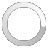

In [7]:
### conora 19로 검색하기 

search_term = "conora 19"
url="https://www.washingtontimes.com/search/?cx=015385541671335030271%3Anfb7f1nj88q&cof=FORID%3A11&ie=UTF-8&q={}&sa=GO".format(search_term)

browser = webdriver.Chrome("/Users/kimkwangil/Project/Covid19_SentimentalAnalysis/LSTM_covid19_news_analysis/chromedriver")

browser.get(url)
sleep(3)

### element를 가지오 오기 

soup = BeautifulSoup(browser.page_source,"html.parser")
print(soup.prettify())

conora19_content=[]
conora19_title=[] 

cur_page_num = 1 
crawl_num = 5

sleep(2)



In [9]:
while cur_page_num <= crawl_num : 
    
    soup = BeautifulSoup(browser.page_source,"html.parser")
    sleep(2)
    conora19_href=[]
    
    print("cur_page_num:",cur_page_num)
    cur_page_num = cur_page_num + 1 
  

    pro_list = soup.select('div.gs-title > a')
    print(len(pro_list))

    try : 
        for v in pro_list:



            print("conora 19 Title:{}".format(v.text.strip()))
            print(v.attrs['href'])
                      
            conora19_title.append(v.text.strip())
            conora19_href.append(v.attrs['href'])

            print()

        print()

    except :
        print("title 발생")
         


    print("cur_page:{},crawl_all_page:{}".format(cur_page_num,crawl_num))


    ## 기사 내부 들어가기 (기사 내용 가지고 오기)

    for num in range(0,19) :

        browser.get(conora19_href[num])
        soup = BeautifulSoup(browser.page_source,"html.parser")
        sleep(6)

        try : 
            browser.execute_script('window.scrollBy(0,-3000)')
            sleep(2)

            WebDriverWait(browser, 3) \
                .until(
                EC.presence_of_element_located((By.CLASS_NAME, 'expand'))).click()

        except: 
            print("확장 버튼 에러")


        soup = BeautifulSoup(browser.page_source,"html.parser")
        sleep(2)

        content_body = ""

        try : 
            conora_body = soup.select('div.bigtext > p')  
            sleep(0.5)

            for i in range(len(conora_body)) : 
                content_body = content_body + str("\n") + conora_body[i].text.strip()
    #             print("body {}:{}".format(i,conora_body[i].text))

            print('******cur_page{},{}*****'.format(cur_page_num,num))
            print("*"*100)    

            print (content_body)
            print("/"*100)
            conora19_content.append(content_body)

        except: 
            print("기사 가져오기 발생")

    

    
    browser.get(url)
    sleep(6)
 
    try: 
        WebDriverWait(browser, 6) \
            .until(
            EC.presence_of_element_located((By.XPATH, '//*[contains(@aria-label,"Page {}")]'.format(cur_page_num)))).click()

        print()
        print("*"*100)
        print("current Page{}:".format(cur_page_num))
        print("*"*100)

        sleep(4)

      
        
    except :
        
        print ("Loading Eorror")

In [10]:

with open("data/washington_times_title.pk", "wb") as f:
    pickle.dump(conora19_title, f)
    
with open("data/washington_times_contents.pk","wb") as f:
    pickle.dump(conora19_content, f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/washington_times_title.pk'

In [11]:
with open("data/washington_times_title.txt", "wb") as f:
    pickle.dump(conora19_title, f)
    
with open("data/washington_times_contents.txt","wb") as f:
    pickle.dump(conora19_content, f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/washington_times_title.txt'

In [37]:
conora19_content

['\nANALYSIS/OPINION:\nIf crisis is a means by which Democrats achieve their political ends — and it is; just think of their famous “never let a crisis go to waste” playbook — then imagine what coronavirus means to the globalists.\nWhat a dizzying opportunity for them to achieve massive goals.\nThis is new world order time — one world order time, in the teachings of the Bible believers.\nNot only is America’s economy crashing. Not only have the world’s producers come to a grinding halt. But citizens are in fear. They don’t know who or what to believe. They’re hunkering in homes, at government’s order. Police are in the streets, enforcing quarantines.\nChurches have closed their doors — some of ‘em, because they face the threat of fines and court action if they don’t.\nSavings accounts and 401(k)s are being depleted by the day.\nBeaches are closed, as are public parks.\n“L.A. sheriff orders all gun stores closed amid coronavirus shutdown,” The Los Angeles Times reported.\nSecond Amendme

In [39]:
conora19_title

['Coronavirus a crisis fit for a new world order - Washington Times',
 'Coronavirus a crisis fit for a new world order - Washington Times',
 "COVID-19 in the U.S.: Doomsday numbers just don't add up ...",
 "COVID-19 in the U.S.: Doomsday numbers just don't add up ...",
 'FDA approves South Korean kits for COVID-19 - Washington Times',
 'FDA approves South Korean kits for COVID-19 - Washington Times',
 'H.R. 6666 a devil of a COVID-19 government surveillance plot ...',
 'H.R. 6666 a devil of a COVID-19 government surveillance plot ...',
 "After an overreaction to COVID-19, it's time to liberate America ...",
 "After an overreaction to COVID-19, it's time to liberate America ...",
 'Taking constitutional rights seriously during COVID-19 pandemic ...',
 'Taking constitutional rights seriously during COVID-19 pandemic ...',
 'Special Section - Coronavirus (COVID-19) pandemic updates ...',
 'Special Section - Coronavirus (COVID-19) pandemic updates ...',
 'YouTube censorship of doctors buck